## CME538 GROUP PROJECT
TTC SUBWAY, TTC BUS AND OC-TRANSPO EXPLORATORY DATA ANALYSIS


### Set up Notebook

In [2]:
import pandas as pd
# 3rd party imports
import os
import json
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 

In [3]:
# Import data
ttc_subway_df = pd.read_csv("ttc_subway_df.csv")
ttc_bus_df = pd.read_csv("ttc_bus_df.csv")
octranspo_df = pd.read_csv("OC_Transpo_Bus_Info_With_Times.csv")

C:\Users\diana\AppData\Local\Temp\ipykernel_10152\2609706711.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  ttc_bus_df = pd.read_csv("ttc_bus_df.csv")


In [4]:
ttc_bus_df.head()

,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
1,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2,2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
3,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
4,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0


In [5]:
octranspo_df

,Unnamed: 0,bus_stop,stop_code,stop_description,route_number,longitude,latitude,gps_speed,trip_start_time,adj_sched_time,adj_age,call_time,stop_id,start_time,stop_sequence,arrival_datetime,call_time_plus_adj
0,0,6941,4055,CHESTERTON / ASSINIBOINE,111,-75.720689,45.351385,18.0,14:43:00,1,0.93,2023-11-29 16:42:39,NaN,NaN,NaN,NaN,0 2023-11-29 16:43:39\r\n1 2023-11-2...
1,1,6941,4055,CHESTERTON / ASSINIBOINE,111,-75.706359,45.375254,12.0,14:58:00,14,0.65,2023-11-29 16:42:39,NaN,NaN,NaN,NaN,0 2023-11-29 16:56:39\r\n1 2023-11-2...
2,2,6941,4055,CHESTERTON / ASSINIBOINE,111,NaN,NaN,NaN,15:12:00,28,-1.00,2023-11-29 16:42:39,NaN,NaN,NaN,NaN,0 2023-11-29 17:10:39\r\n1 2023-11-2...
3,3,572,4055,CHESTERTON / ASSINIBOINE,111,-75.720689,45.351385,18.0,14:43:00,1,0.93,2023-11-29 16:42:40,NaN,NaN,NaN,NaN,0 2023-11-29 16:43:39\r\n1 2023-11-2...
4,4,572,4055,CHESTERTON / ASSINIBOINE,111,-75.706359,45.375254,12.0,14:58:00,14,0.65,2023-11-29 16:42:40,NaN,NaN,NaN,NaN,0 2023-11-29 16:56:39\r\n1 2023-11-2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4196,4196,4912,4149,FIELDING / RANKIN,290,NaN,NaN,NaN,16:06:00,41,-1.00,2023-11-29 17:05:59,NaN,NaN,NaN,NaN,0 2023-11-29 17:23:39\r\n1 2023-11-2...
4197,4197,4912,4149,FIELDING / RANKIN,290,NaN,NaN,NaN,16:35:00,70,-1.00,2023-11-29 17:05:59,NaN,NaN,NaN,NaN,0 2023-11-29 17:52:39\r\n1 2023-11-2...
4198,4198,4921,4149,FIELDING / RANKIN,290,-75.681098,45.378233,20.0,15:41:00,15,0.30,2023-11-29 17:06:00,NaN,NaN,NaN,NaN,0 2023-11-29 16:57:39\r\n1 2023-11-2...
4199,4199,4921,4149,FIELDING / RANKIN,290,NaN,NaN,NaN,16:06:00,41,-1.00,2023-11-29 17:06:00,NaN,NaN,NaN,NaN,0 2023-11-29 17:23:39\r\n1 2023-11-2...


## TTC SUBWAY

In [6]:
ttc_subway_df.head()

,Unnamed: 0,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [7]:
# print dataframe info
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Date        108004 non-null  object
 2   Time        108004 non-null  object
 3   Day         108004 non-null  object
 4   Station     108004 non-null  object
 5   Code        108004 non-null  object
 6   Min Delay   108004 non-null  int64 
 7   Min Gap     108004 non-null  int64 
 8   Bound       79240 non-null   object
 9   Line        107675 non-null  object
 10  Vehicle     108004 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 9.1+ MB


In [8]:
#Convert the 'Date' colum to datetime format
ttc_subway_df['Date'] = pd.to_datetime(ttc_subway_df['Date'])
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108004 entries, 0 to 108003
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  108004 non-null  int64         
 1   Date        108004 non-null  datetime64[ns]
 2   Time        108004 non-null  object        
 3   Day         108004 non-null  object        
 4   Station     108004 non-null  object        
 5   Code        108004 non-null  object        
 6   Min Delay   108004 non-null  int64         
 7   Min Gap     108004 non-null  int64         
 8   Bound       79240 non-null   object        
 9   Line        107675 non-null  object        
 10  Vehicle     108004 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 9.1+ MB


In [9]:
# Set the data colum as the index
#Subway DF
ttc_subway_df.set_index('Date', inplace = True)
ttc_subway_df.head()



,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
Date,,,,,,,,,,
2022-01-01,0,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
2022-01-01,1,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2022-01-01,2,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
2022-01-01,3,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
2022-01-01,4,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


### Time-based indexing

In [10]:
# Add new columns 'year', 'month' and 'month_day'that indicate the year, month and day associated with each observation

ttc_subway_df['year'] = ttc_subway_df.index.year
ttc_subway_df['month'] = ttc_subway_df.index.month
ttc_subway_df['month_day'] = ttc_subway_df.index.day
ttc_subway_df.tail()

,Unnamed: 0,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,year,month,month_day
Date,,,,,,,,,,,,,
2021-12-31,107999,01:10,Friday,MUSEUM STATION,SUUT,0,0,N,YU,5591,2021,12,31
2021-12-31,108000,01:12,Friday,FINCH STATION,SUDP,5,10,S,YU,5983,2021,12,31
2021-12-31,108001,01:21,Friday,EGLINTON WEST STATION,PUOPO,3,8,N,YU,6046,2021,12,31
2021-12-31,108002,01:37,Friday,SHEPPARD WEST STATION,SUDP,0,0,S,YU,5536,2021,12,31
2021-12-31,108003,07:00,Friday,DON MILLS STATION,TUSC,0,0,E,SHP,6146,2021,12,31


In [11]:
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108004 entries, 2022-01-01 to 2021-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  108004 non-null  int64 
 1   Time        108004 non-null  object
 2   Day         108004 non-null  object
 3   Station     108004 non-null  object
 4   Code        108004 non-null  object
 5   Min Delay   108004 non-null  int64 
 6   Min Gap     108004 non-null  int64 
 7   Bound       79240 non-null   object
 8   Line        107675 non-null  object
 9   Vehicle     108004 non-null  int64 
 10  year        108004 non-null  int32 
 11  month       108004 non-null  int32 
 12  month_day   108004 non-null  int32 
dtypes: int32(3), int64(4), object(6)
memory usage: 10.3+ MB


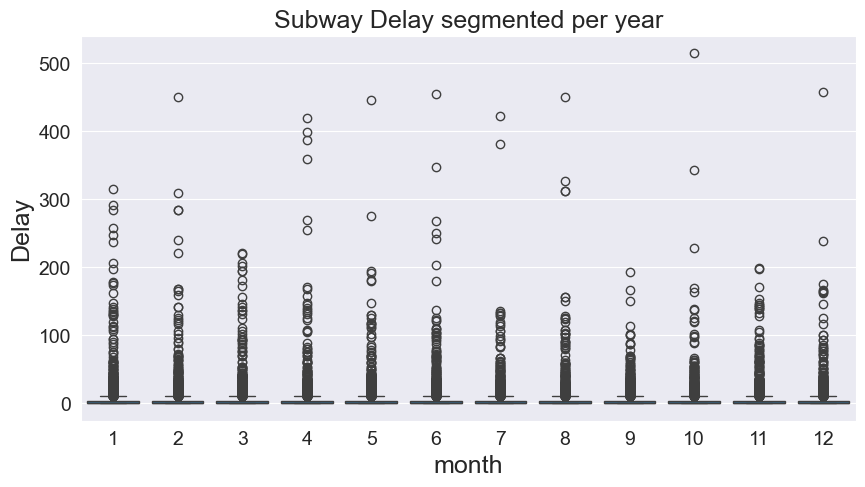

In [12]:
# PLot boxplot of delay per year
plt.figure(figsize=(10, 5))
plt.title('Subway Delay segmented per year', fontsize=18)
ax = sns.boxplot(x = ttc_subway_df['month'] , y = ttc_subway_df['Min Delay'])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xlabel('month', fontsize=18)
ax.set_ylabel('Delay', fontsize=18)
plt.show()

#I don't know why it doesnt graph boxplots

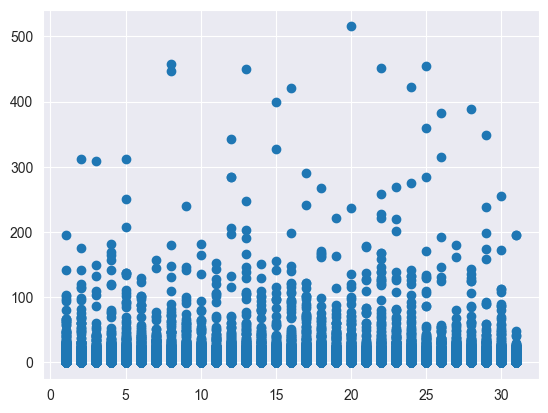

In [13]:
plt.scatter(ttc_subway_df['month_day'], ttc_subway_df['Min Delay'])
plt.show()

### Seasonal changes

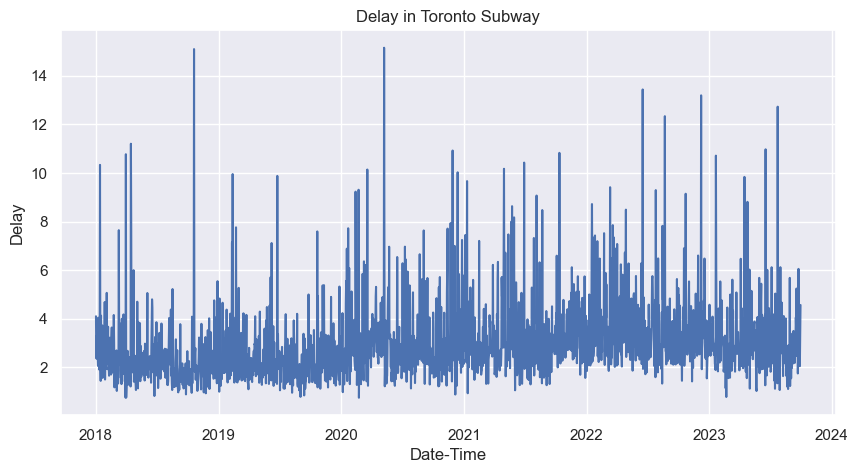

In [14]:
#Plot Toronto Delay 
sns.set()  # Resets styles to default
plt.figure(figsize=(10,5))
sns.lineplot(x=ttc_subway_df.index, y=ttc_subway_df['Min Delay'],errorbar= None)

# Set labels 
plt.xlabel('Date-Time', fontsize=12)
plt.ylabel('Delay', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

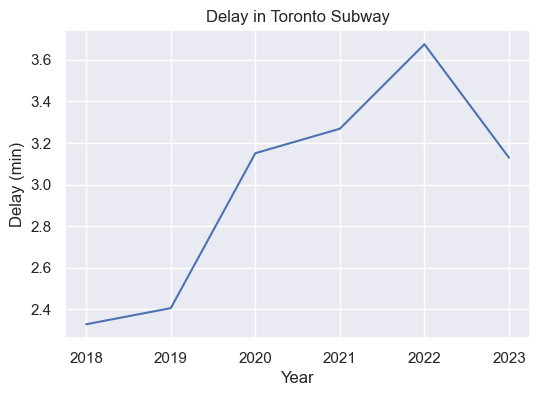

In [15]:
#Plot Toronto Delay by year 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df['year'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

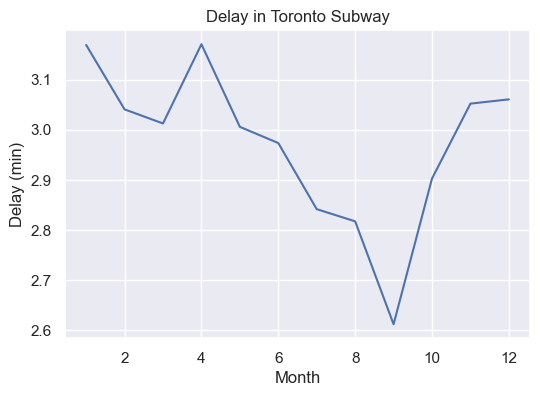

In [16]:
#Plot Toronto Delay by month 
sns.set()  # Resets styles to default
plt.figure(figsize=(6,4))
sns.lineplot(x=ttc_subway_df['month'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Month', fontsize=12)
plt.ylabel('Delay (min)', fontsize=12)
plt.title("Delay in Toronto Subway")

plt.show()

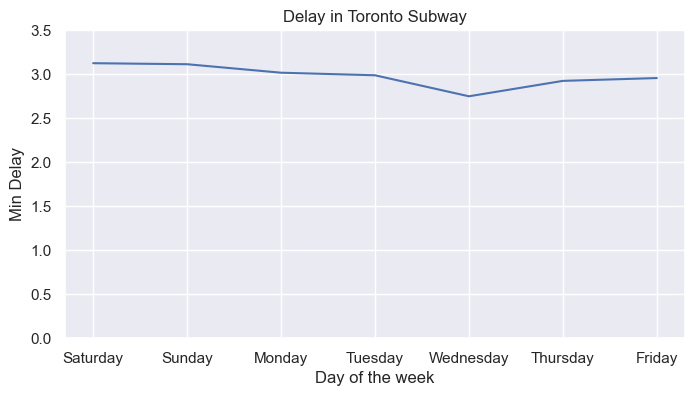

In [17]:
#Plot Toronto Delay by day of the week
sns.set()  # Resets styles to default
plt.figure(figsize=(8,4))
sns.lineplot(x=ttc_subway_df['Day'], y=ttc_subway_df['Min Delay'],errorbar=None)

# Set labels 
plt.xlabel('Day of the week', fontsize=12)
plt.title("Delay in Toronto Subway")

# Set y-axis range starting from 0
plt.ylim(0, 3.5) 
plt.show()

### Peak and off-peak hours

### Outliers

In [18]:
#Remove Min Delay outliers
# Calculate the quartiles and IQR
Q1= ttc_subway_df['Min Delay'].quantile(0.25)
Q3= ttc_subway_df['Min Delay'].quantile(0.75)
IQR =Q3-Q1

#Define the bounds for outlier removal
lower_bound= Q1-1.5*IQR
upper_bound= Q3 +1.5*IQR

#Remove outliers by creating a mask
mask= (ttc_subway_df['Min Delay']<= upper_bound)
ttc_subway_df = ttc_subway_df[mask]

# View DataFrame
ttc_subway_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102486 entries, 2022-01-01 to 2021-12-31
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  102486 non-null  int64 
 1   Time        102486 non-null  object
 2   Day         102486 non-null  object
 3   Station     102486 non-null  object
 4   Code        102486 non-null  object
 5   Min Delay   102486 non-null  int64 
 6   Min Gap     102486 non-null  int64 
 7   Bound       73761 non-null   object
 8   Line        102157 non-null  object
 9   Vehicle     102486 non-null  int64 
 10  year        102486 non-null  int32 
 11  month       102486 non-null  int32 
 12  month_day   102486 non-null  int32 
dtypes: int32(3), int64(4), object(6)
memory usage: 9.8+ MB


In [19]:
ttc_subway_df.describe()

,Unnamed: 0,Min Delay,Min Gap,Vehicle,year,month,month_day
count,102486.000000,102486.000000,102486.000000,102486.00000,102486.000000,102486.000000,102486.000000
mean,54011.082167,1.729475,3.081777,3530.84354,2020.405851,6.291269,15.865074
std,31069.249287,2.529287,4.378530,2654.52430,1.750560,3.403803,8.827406
min,0.000000,0.000000,0.000000,0.00000,2018.000000,1.000000,1.000000
25%,27281.250000,0.000000,0.000000,0.00000,2019.000000,3.000000,8.000000
50%,53817.500000,0.000000,0.000000,5167.00000,2020.000000,6.000000,16.000000
75%,80963.750000,3.000000,7.000000,5646.00000,2022.000000,9.000000,24.000000
max,108003.000000,10.000000,27.000000,69021.00000,2023.000000,12.000000,31.000000


C:\Users\diana\AppData\Local\Temp\ipykernel_10152\1108744901.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')


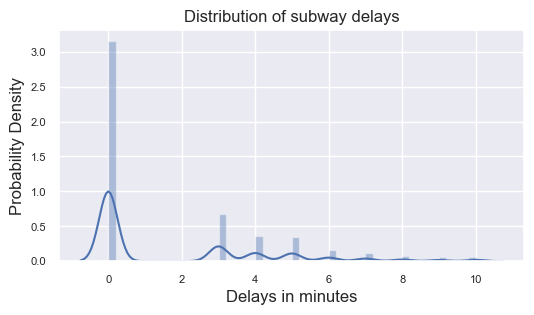

In [20]:
# Create probability density plot 
plt.figure(figsize=(6,3))
ttc_delays=sns.distplot(ttc_subway_df['Min Delay'], label='Distribution of subway delays')

# Set labels and legend
plt.xlabel('Delays in minutes', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Distribution of subway delays')

#Change tick sizes
ttc_delays.xaxis.set_tick_params(labelsize=8)
ttc_delays.yaxis.set_tick_params(labelsize=8)

# Show the plot
plt.show()

### Unique Values

In [21]:
# Unique values in the dataframe
print ('Number of unique Stations:',ttc_subway_df['Station'].nunique())
print ('Number of unique codes:',ttc_subway_df['Code'].nunique())
print ('Number of unique bound:',ttc_subway_df['Bound'].nunique())
print ('Number of unique lines:',ttc_subway_df['Line'].nunique())
print ('Number of unique vehicles:',ttc_subway_df['Vehicle'].nunique())



Number of unique Stations: 826
Number of unique codes: 206
Number of unique bound: 7
Number of unique lines: 55
Number of unique vehicles: 1068


## TTC BUS 

In [22]:
ttc_bus_df.head()

,Unnamed: 0,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,0,2018-01-01,165,00:17:00,Monday,Wilson Stn,Mechanical,10.0,20.0,W/B,1291.0
1,1,2018-01-01,706,00:20:00,Monday,Birchmount Garage,Utilized Off Route,1.0,1.0,S/B,8123.0
2,2,2018-01-01,28,00:30:00,Monday,Davisville Station,Investigation,30.0,60.0,S/B,8306.0
3,3,2018-01-01,12,00:55:00,Monday,Kennedy Station,Mechanical,22.0,44.0,S/B,7777.0
4,4,2018-01-01,72,00:55:00,Monday,Pape Station,Mechanical,18.0,36.0,NaN,7787.0


In [23]:
#Convert the 'Date' colum to datetime format
ttc_bus_df['Date'] = pd.to_datetime(ttc_bus_df['Date'])
ttc_bus_df.info()

KeyError: 'Date'

In [ ]:
# Set the data colum as the index
ttc_bus_df.set_index('Date', inplace = True)
ttc_bus_df.head()

In [ ]:
ttc_bus_df.describe()

In [ ]:
ttc_bus_df.head()

## OC TRANSPO

In [ ]:
octranspo_df.head()